# Bike sharing demand

## Exploratory data analysis

In [242]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [244]:
#read the file.
data_frame=pd.read_csv('train_bikes.csv')

In [245]:
data_frame.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Missing values

In [246]:
data_frame.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in training data.

### Checking the relationship between the indepedent(input) features and dependent(output) feature

In [247]:
for cols in data_frame.columns:
    print(cols,': ',data_frame[cols].dtype)

datetime :  object
season :  int64
holiday :  int64
workingday :  int64
weather :  int64
temp :  float64
atemp :  float64
humidity :  int64
windspeed :  float64
casual :  int64
registered :  int64
count :  int64


In [248]:
data_frame['datetime']=pd.to_datetime(data_frame['datetime'])
data_frame['Month']=pd.DatetimeIndex(data_frame['datetime']).month
data_frame['Weekday']=pd.DatetimeIndex(data_frame['datetime']).weekday
data_frame['Year']=pd.DatetimeIndex(data_frame['datetime']).year
data_frame['Hour']=pd.DatetimeIndex(data_frame['datetime']).hour

In [249]:
data_frame.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Weekday,Year,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011,4


In [250]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [251]:
#discrete features data
data_frame[categorical_features].head()

""
0
1
2
3
4


In [252]:
#continous features data
data_frame[numerical_features].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Weekday,Year,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011,4


## Relationship between the categorical features and output feature.

In [253]:
for cols in categorical_features:
    plt.title('Relationship between '+cols+' and count feature')
    if cols=='weather':
        plt.xticks(rotation=45)
        sns.barplot(data_frame[cols],data_frame['count'])
        plt.show()
    else:
        sns.barplot(data_frame[cols],data_frame['count'])
        plt.show()

## Relationship between the numerical feature and output feature.

In [254]:
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [255]:
#discrete_features data
data_frame[categorical_features].head()

""
0
1
2
3
4


In [256]:
#continuos features
data_frame[continuos_features].head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1


## Relationship between discrete features and output feature.

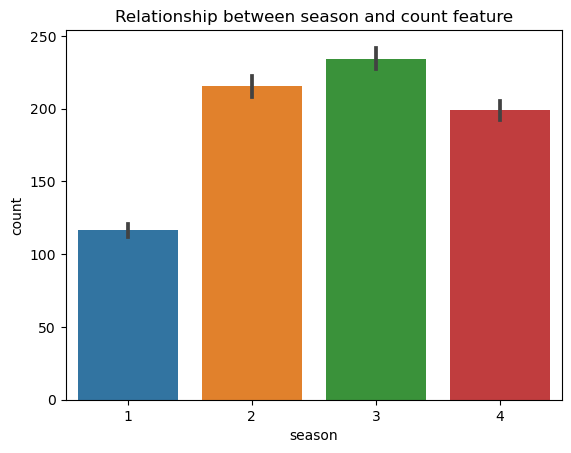

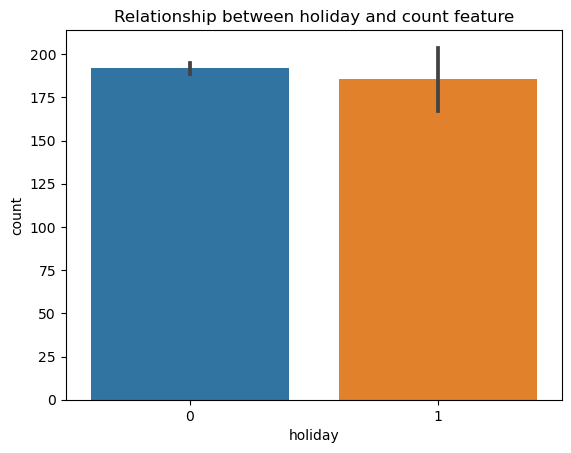

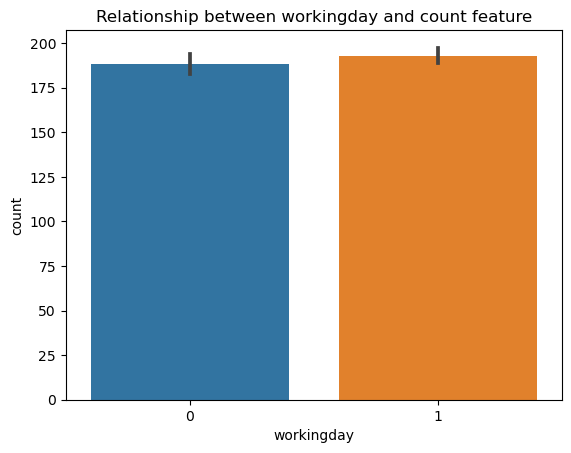

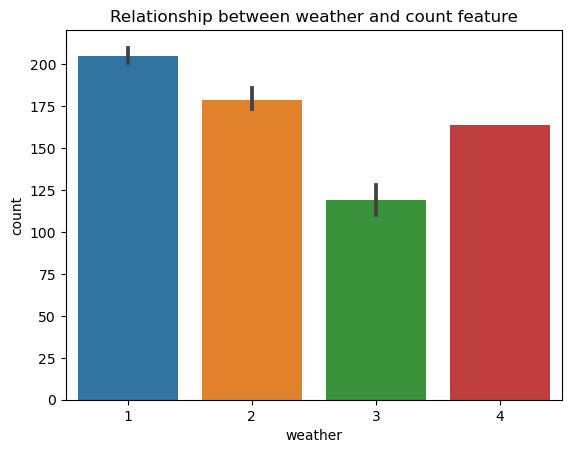

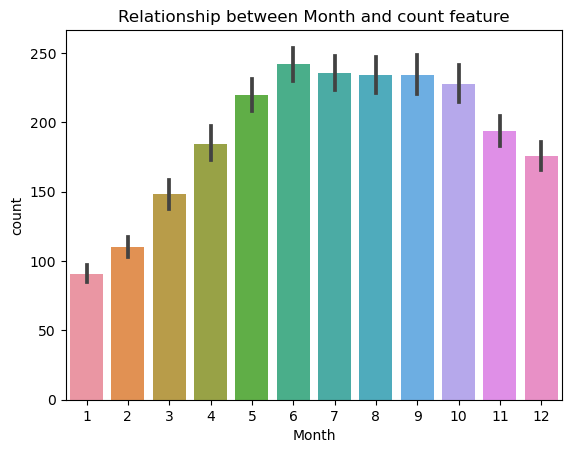

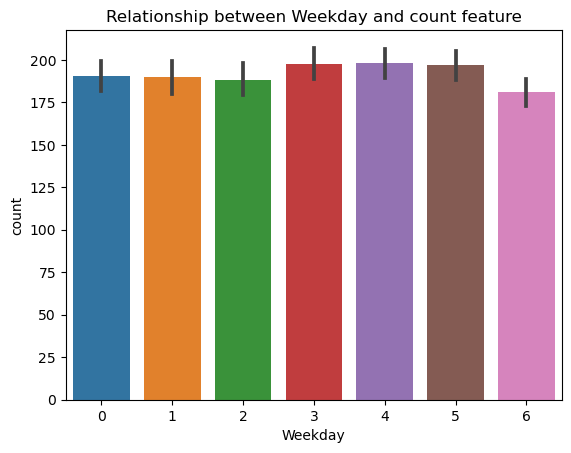

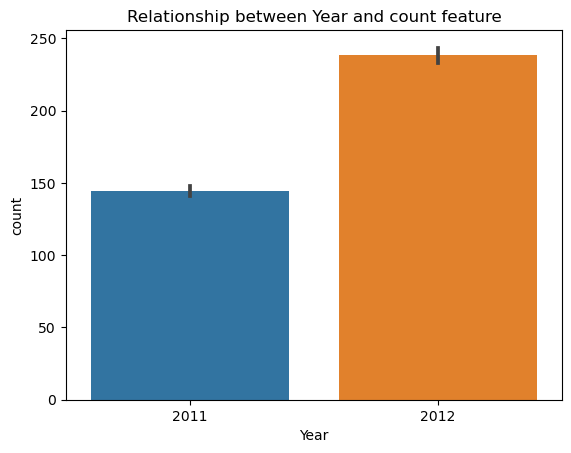

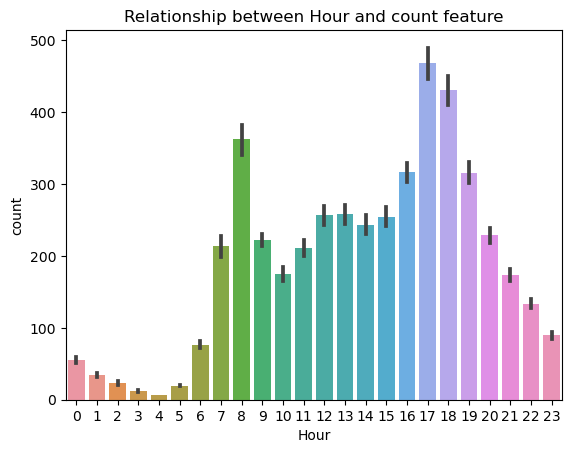

In [257]:
for cols in discrete_features:
    plt.title('Relationship between '+cols+' and count feature')
    sns.barplot(data_frame[cols],data_frame['count'])
    plt.show()

## Relationship between the continuos features and output feature.

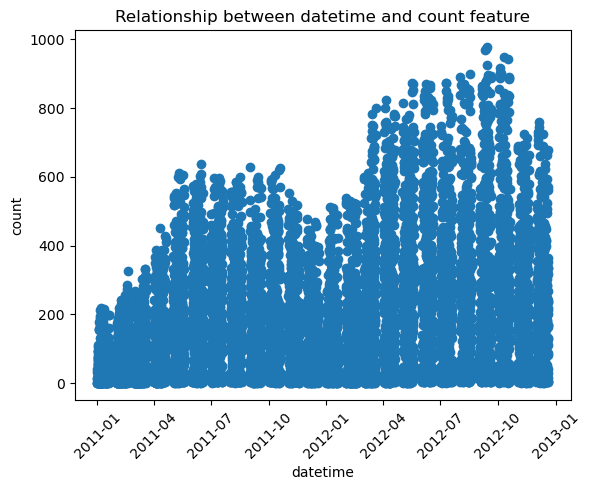

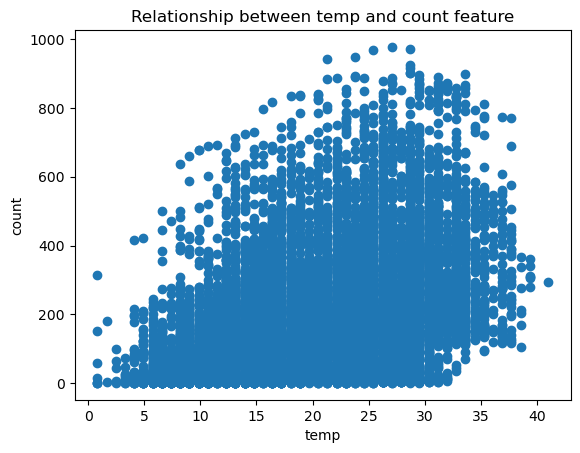

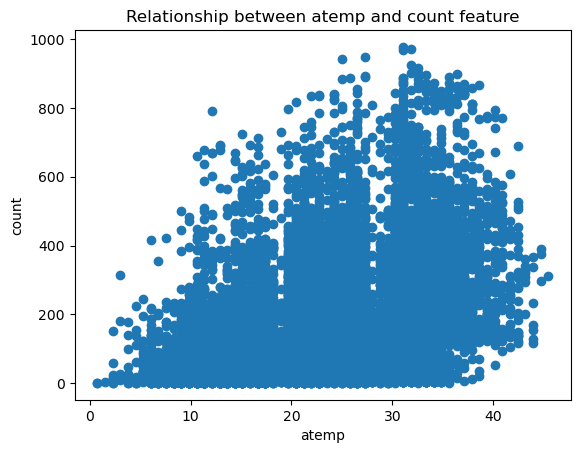

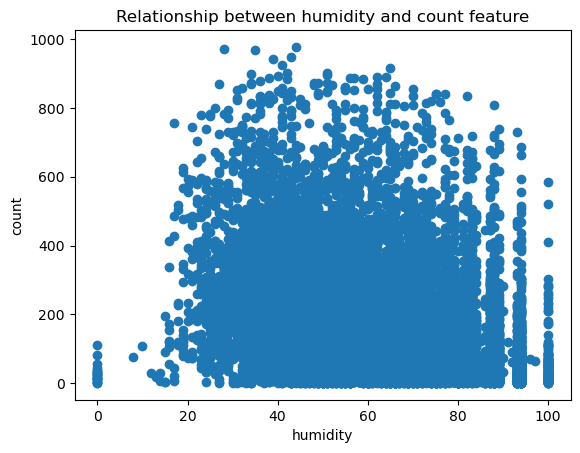

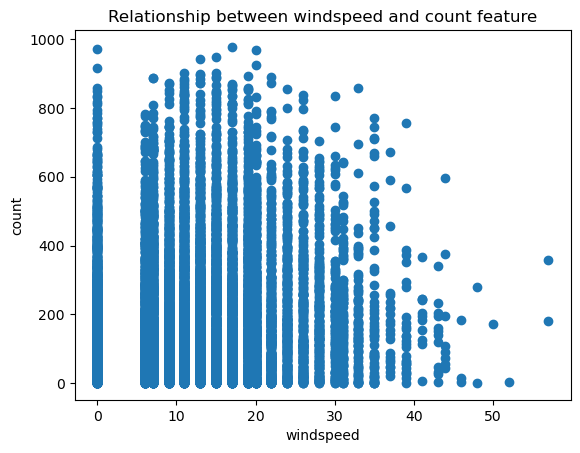

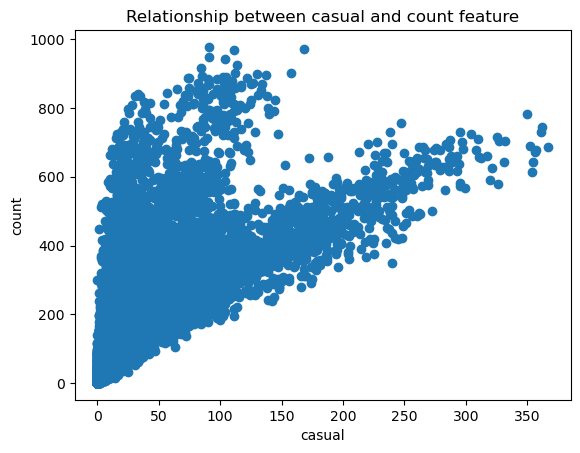

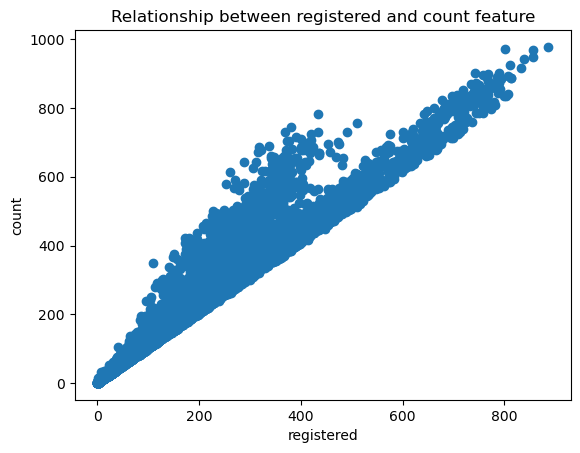

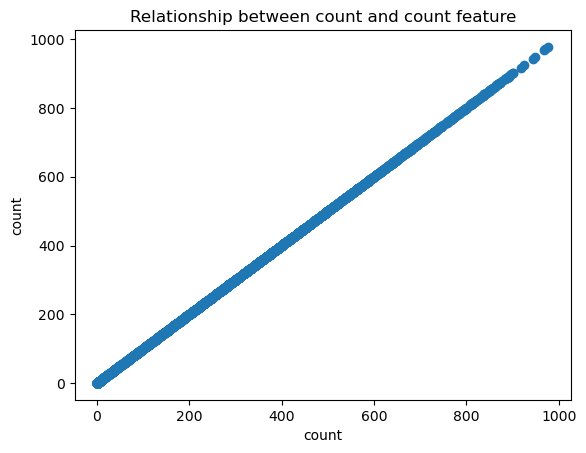

In [258]:
for cols in continuos_features:
    if cols=='datetime':
        plt.xticks(rotation=45)
    plt.title('Relationship between '+cols+' and count feature')
    plt.xlabel(cols)
    plt.ylabel('count')
    plt.scatter(data_frame[cols],data_frame['count'])
    plt.show()

## Distribution of continuos features

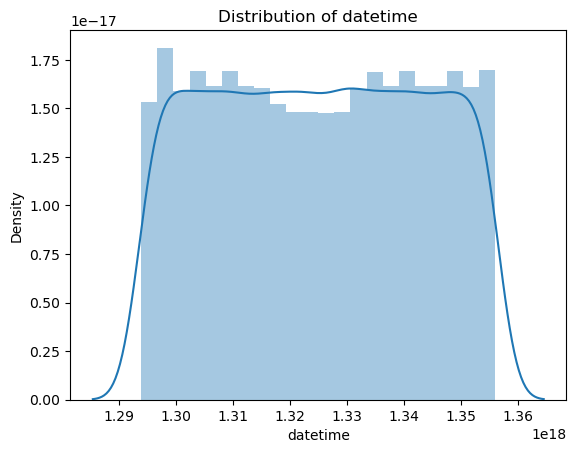

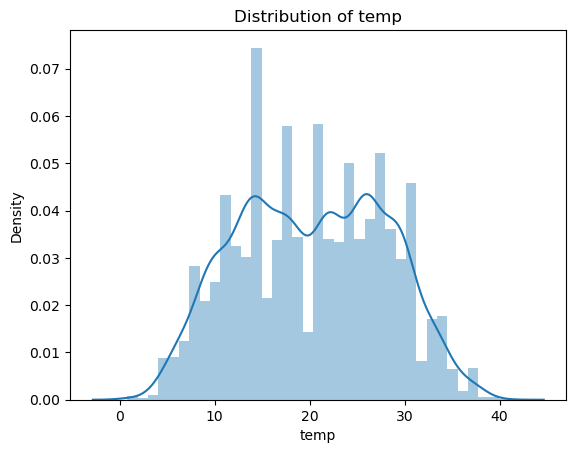

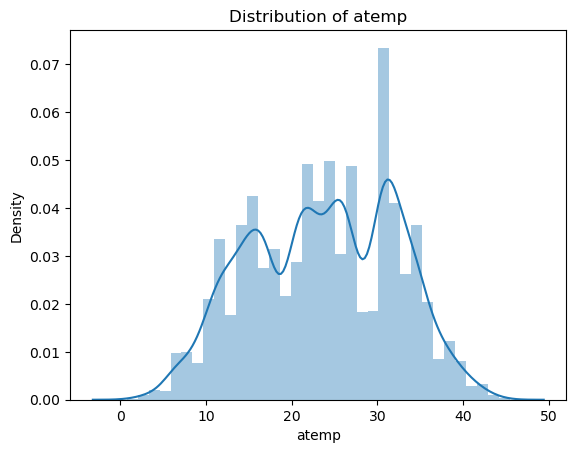

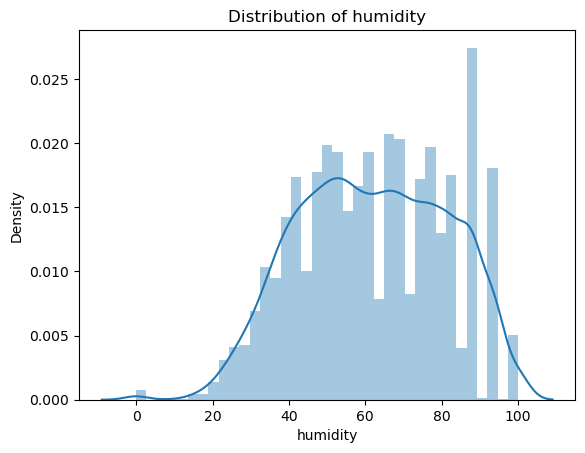

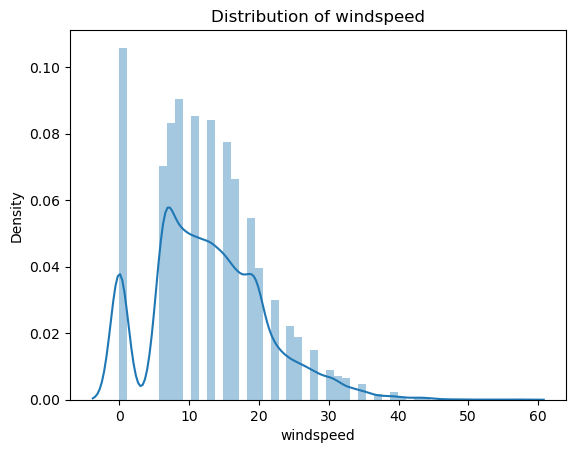

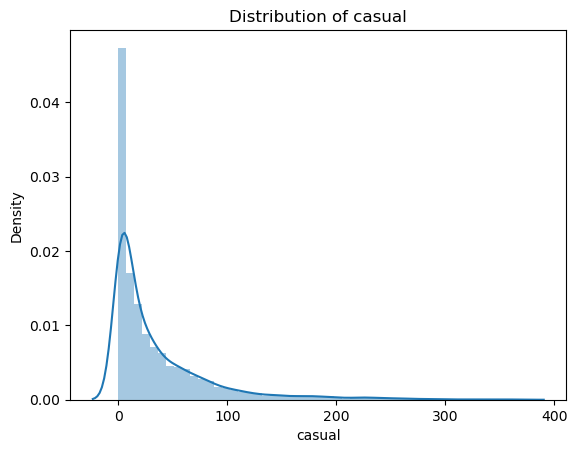

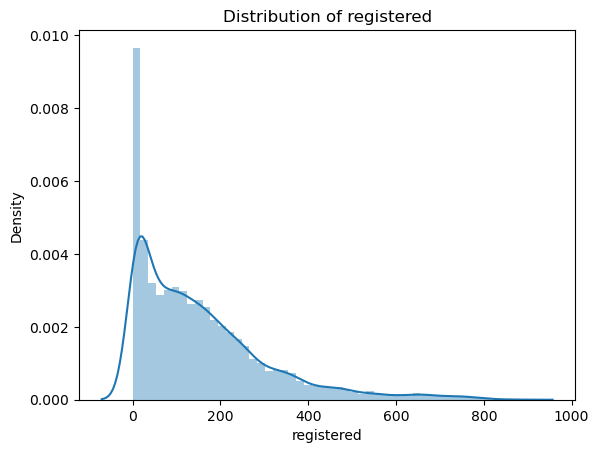

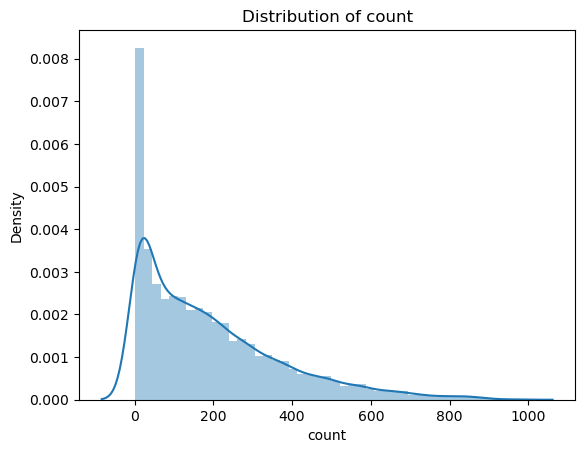

In [259]:
for cols in continuos_features:
    plt.title('Distribution of '+cols)
    sns.distplot(data_frame[cols])
    plt.show()

Some features of continuos data are skewed

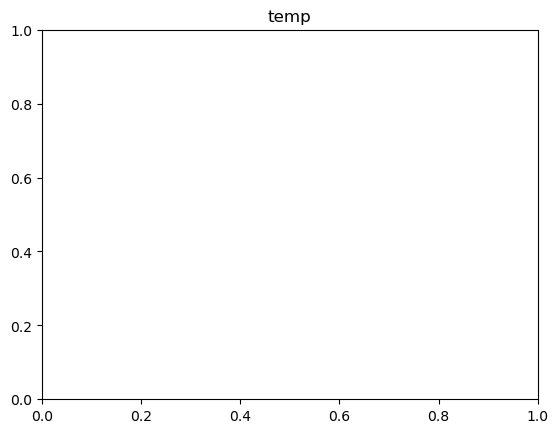

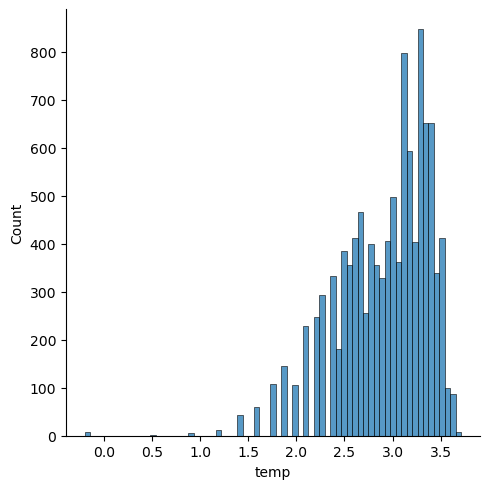

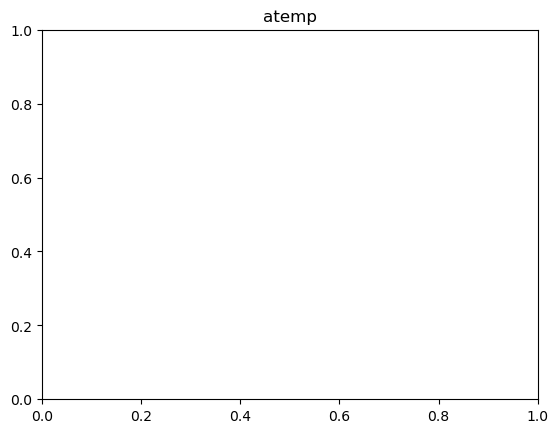

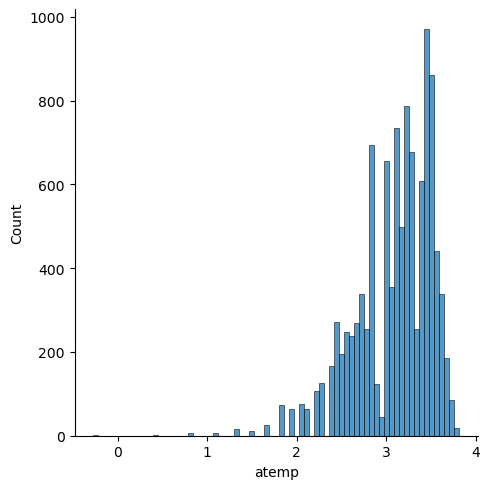

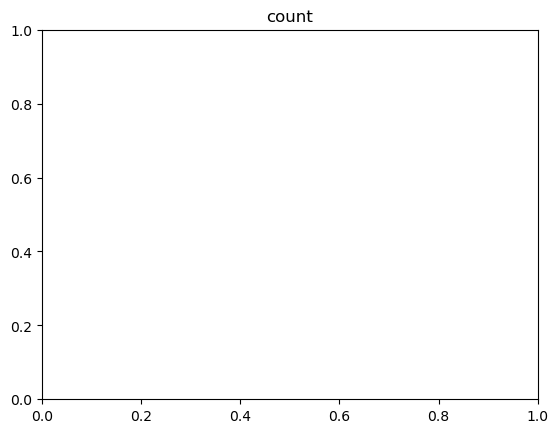

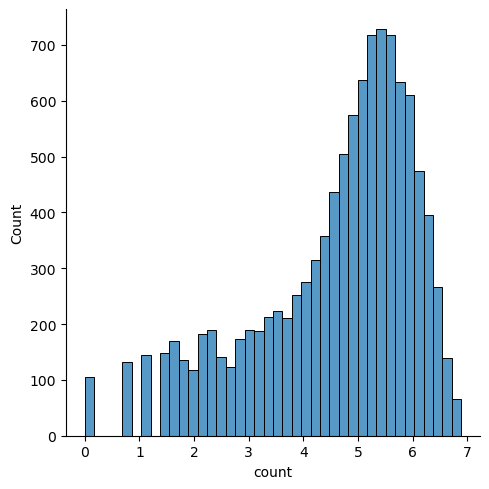

In [260]:
for cols in continuos_features:
    if 0 not in data_frame[cols].unique():
        if cols!='datetime':
            data=data_frame.copy()
            data[cols]=np.log(data[cols])
            plt.title(cols)
            sns.displot(data[cols])
            plt.show()

The data is same after performing the log normal distribution.

## Finding the utliers

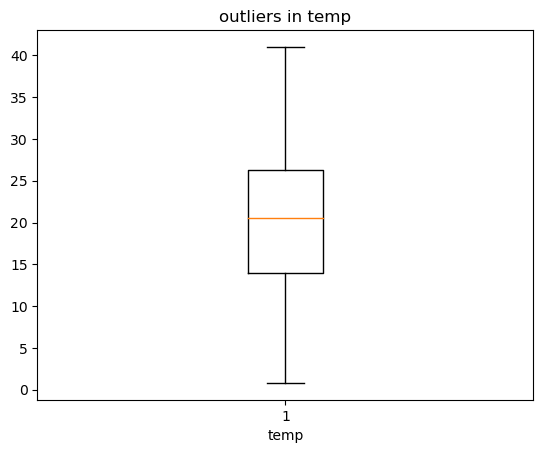

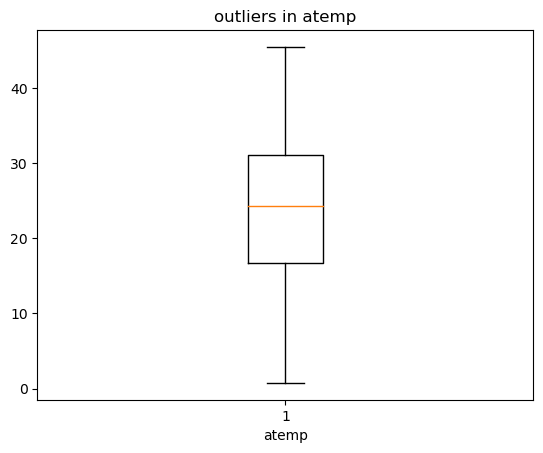

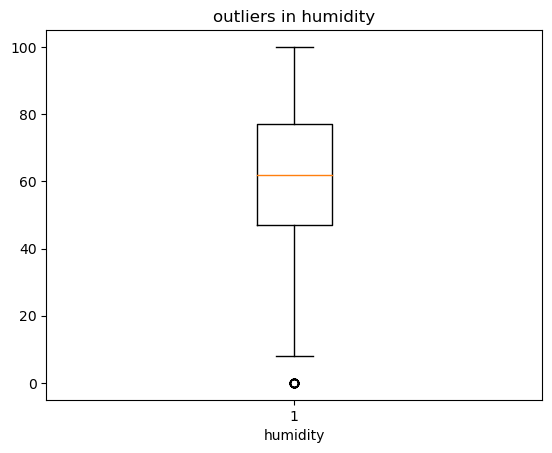

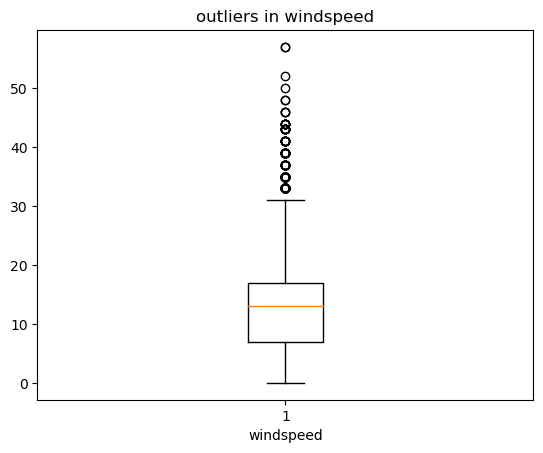

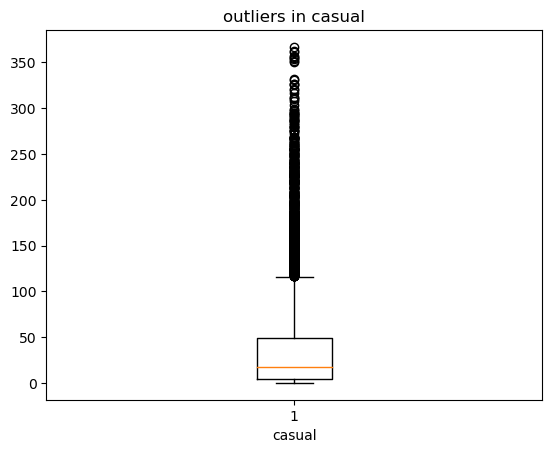

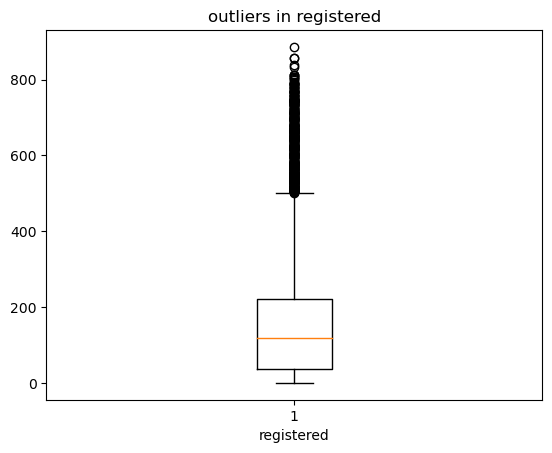

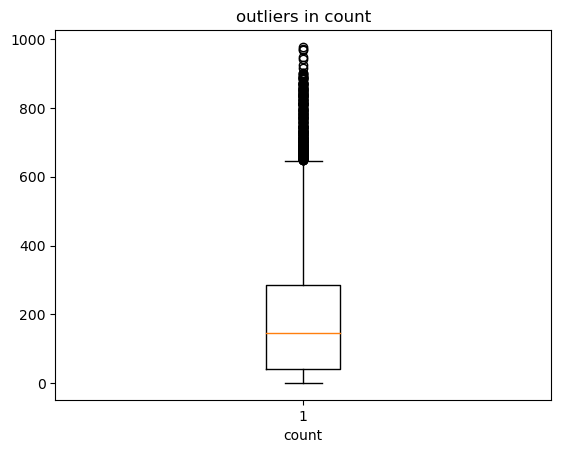

In [261]:
for cols in continuos_features:
    if cols!='datetime':
        plt.title('outliers in '+cols)
        plt.xlabel(cols)
        plt.boxplot(data_frame[cols])
        plt.show()